In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy.linalg import lstsq
from numpy.random import randn, seed
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format
seed(42)

## Linear Projection: Principal Component Analysis

### Create Noisy, Correlated Data from Signal

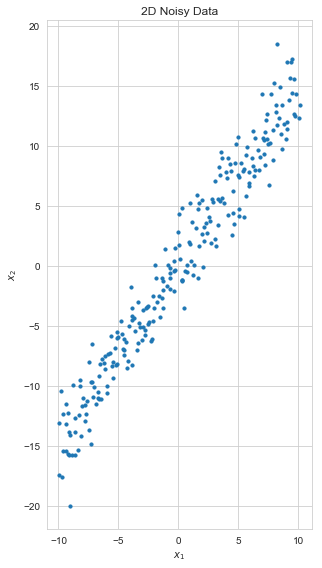

In [3]:
n_signals = 250
x1 = np.linspace(-10, 10, n_signals) + .1 * randn(n_signals)
x2 = 1.5 * x1 + 2 * randn(n_signals)
data = pd.DataFrame({'$x_1$': x1, '$x_2$': x2})
ax = data.plot.scatter(x=0, y=1, s=10, title='2D Noisy Data', figsize=(7,8))
ax.set_aspect('equal')
plt.tight_layout()

### Compute Principal Components 

In [4]:
pca = PCA()
pca.fit(data)
pca.components_

array([[-0.54381787, -0.83920327],
       [ 0.83920327, -0.54381787]])

In [5]:
mean = pca.mean_
mean

array([-0.00024229,  0.03183435])

In [6]:
pc1, pc2 = np.split(pca.components_.T, 2, axis=1)
pc1

array([[-0.54381787],
       [-0.83920327]])

#### Check share of explained variance

In [7]:
pca.explained_variance_ratio_

array([0.98929523, 0.01070477])

### Components are orthogonal to each other

In [8]:
np.dot(pc1.T, pc2)

array([[0.]])

### Plot Principal Components as new Basis Vectors

In [9]:
l1, l2 = pca.singular_values_ / 10

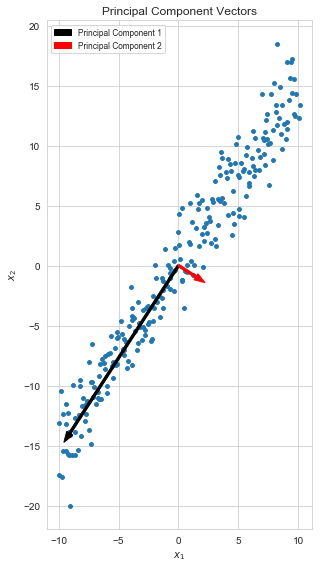

In [10]:
ax = data.plot.scatter(x=0, y=1, s=15, title='Principal Component Vectors', figsize=(6,8))
ax.set_aspect('equal')
origin_x, origin_y = pca.mean_
dx1, dy1 = np.squeeze(pc1.T) * l1
dx2, dy2 = np.squeeze(pc2.T) * l2
pc1_arrow = ax.arrow(origin_x, origin_y, dx1, dy1,  width=.2, color='k')
pc2_arrow = ax.arrow(origin_x, origin_y, dx2, dy2,  width=.2, color='r')
plt.legend([pc1_arrow, pc2_arrow], 
           ['Principal Component 1', 'Principal Component 2'], 
           fontsize='small')
plt.tight_layout()

### Project 2D data onto the first Principal Component

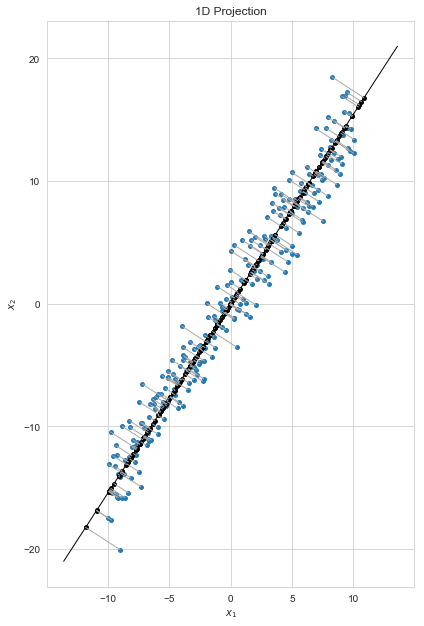

In [11]:
# de-mean data, convert to numpy array
data_ = data.sub(data.mean())
X_ = data_.values
x_, y_ = X_.T
ax = pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$', 
                                                           y='$x_2$', 
                                                           s=15, 
                                                           title='1D Projection', 
                                                           figsize=(6, 12))
ax.set_aspect('equal')

# plot first component
t = np.linspace(-25, 25, n_signals)
pc_x, pc_y = t * pc1
ax.plot(pc_x, pc_y, c='k', lw=1)

# project original data on first component
proj_x, proj_y = (X_.dot(pc1) * pc1.T).T
ax.scatter(proj_x, proj_y, s=15, c='k')

# plot link from data to projected points
lines_x, lines_y = np.c_[x_, proj_x], np.c_[y_, proj_y]
ax.plot(lines_x.T, lines_y.T, lw=1, c='darkgrey')
plt.tight_layout()

### Plot 1D Representation 

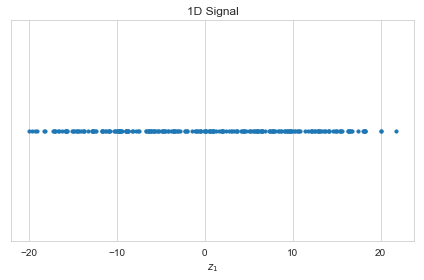

In [12]:
projection1D = data_.dot(pc1)
ax = projection1D.rename(columns={0: '$z_1$'})\
    .assign(x2=0).plot.scatter(x='$z_1$', y='x2', s=10, title='1D Signal')
ax.get_yaxis().set_visible(False)
plt.tight_layout();

### Compare to Linear Regression

/home/stefan/.pyenv/versions/miniconda3-latest/envs/ml4t/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


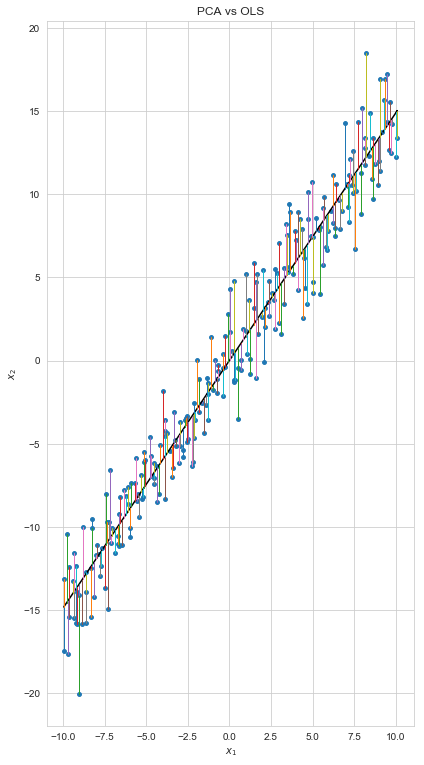

In [13]:
ax = pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$', 
                                                           y='$x_2$', 
                                                           s=15, 
                                                           title='PCA vs OLS', 
                                                           figsize=(6, 12))
ax.set_aspect('equal')

# get OLS line
reg_X = np.column_stack((x_, np.ones_like(x_)))
(m, b), _, _, _ = lstsq(reg_X, y_)
reg_y = m * x_ + b
ax.plot(x_, reg_y, c='k')

# plot residuals
lines_x, lines_y = np.c_[x_, x_], np.c_[y_, reg_y]
ax.plot(lines_x.T, lines_y.T, lw=1)
plt.tight_layout()

## Combined Figure

/home/stefan/.pyenv/versions/miniconda3-latest/envs/ml4t/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


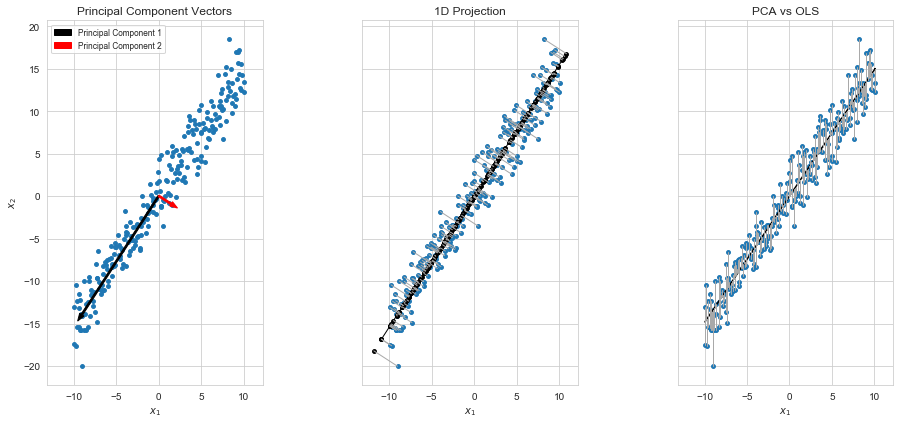

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 6), sharex=True, sharey=True)

title='Principal Component Vectors'
data.plot.scatter(x=0, y=1, s=15, ax=axes[0], title=title)
axes[0].set_aspect('equal')

origin_x, origin_y = pca.mean_
dx1, dy1 = np.squeeze(pc1.T) * l1
dx2, dy2 = np.squeeze(pc2.T) * l2
pc1_arrow = axes[0].arrow(origin_x, origin_y, dx1, dy1,  width=.2, color='k')
pc2_arrow = axes[0].arrow(origin_x, origin_y, dx2, dy2,  width=.2, color='r')
axes[0].legend([pc1_arrow, pc2_arrow],
               ['Principal Component 1', 'Principal Component 2'],
               fontsize='small')

# de-mean data, convert to numpy array
data_ = data.sub(data.mean())
X_ = data_.values
x_, y_ = X_.T
pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$',
                                                      y='$x_2$',
                                                      s=15,
                                                      title='1D Projection',
                                                      ax=axes[1])
axes[1].set_aspect('equal')

# plot first component
t = np.linspace(-20, 20, n_signals)
pc_x, pc_y = t * pc1
axes[1].plot(pc_x, pc_y, c='k', lw=1)

# project original data on first component
proj_x, proj_y = (X_.dot(pc1) * pc1.T).T
axes[1].scatter(proj_x, proj_y, s=15, c='k')

# plot link from data to projected points
lines_x, lines_y = np.c_[x_, proj_x], np.c_[y_, proj_y]
axes[1].plot(lines_x.T, lines_y.T, lw=1, c='darkgrey')

pd.DataFrame({'$x_1$': x_, '$x_2$': y_}).plot.scatter(x='$x_1$',
                                                      y='$x_2$',
                                                      s=15,
                                                      title='PCA vs OLS',
                                                      ax=axes[2])
ax = axes[2].set_aspect('equal')

# get OLS line
reg_X = np.column_stack((x_, np.ones_like(x_)))
(m, b), _, _, _ = lstsq(reg_X, y_)
reg_y = m * x_ + b
ax = axes[2].plot(x_, reg_y, c='k')

# plot residuals
lines_x, lines_y = np.c_[x_, x_], np.c_[y_, reg_y]
ax = axes[2].plot(lines_x.T, lines_y.T, lw=1, c='darkgrey')

fig.tight_layout()
# fig.savefig('figures/pc_comparison', dpi=600);

### Recover Data using Inverse Transformation 1D => 2D

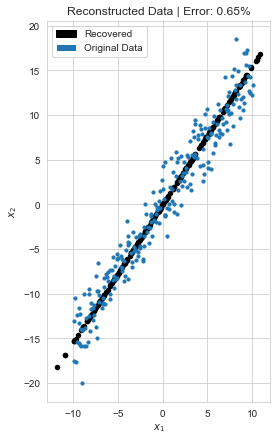

In [16]:
recovered_data = projection1D.dot(pc1.T).rename(columns={0: '$x_1$', 1: '$x_2$'})

rms_reconstruction_error = np.sqrt(np.mean(np.sum(np.square(recovered_data-data_), axis=1)))

rss_data = np.sqrt(np.sum(data_.values**2))

relative_loss = rms_reconstruction_error / rss_data

title='Reconstructed Data | Error: {:.2%}'.format(relative_loss)
ax = recovered_data.plot.scatter(x=0, y=1, title=title, c='k')
ax.set_aspect('equal')
data_.plot.scatter(x=0, y=1, s=10, ax=ax, figsize=(4,8))
plt.legend(handles=[Patch(color='k', label='Recovered'),  
                    Patch(label='Original Data')])
plt.tight_layout()

### Projection and inverse transformation lead to the same result

In [17]:
np.allclose(recovered_data, X_.dot(pc1) * pc1.T)

True